In [45]:
import os
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 
import h5py

In [49]:
feature_dir = 'featureout_loftr'
images = 'dirname'

In [47]:
def load_image(image_path):
    """Loads an image from file."""
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def visualize_keypoints(image_dir, keypoints, num_images=5):
    sample_keys = random.sample(list(keypoints.keys()), num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for ax, key in zip(axes, sample_keys):
        img_path = os.path.join(image_dir, key)
        img = load_image(img_path)
        kp = keypoints[key]
        ax.imshow(img)
        ax.scatter(kp[:, 0], kp[:, 1], s=10, c='red', marker='o')
        ax.axis('off')
        ax.set_title(key)  # Add the image name as the title
    plt.show()

# Load keypoints from the saved file
def load_keypoints(feature_dir):
    with h5py.File(f'{feature_dir}/keypoints.h5', 'r') as f:
        keypoints = {k: f[k][...] for k in f.keys()}
    return keypoints

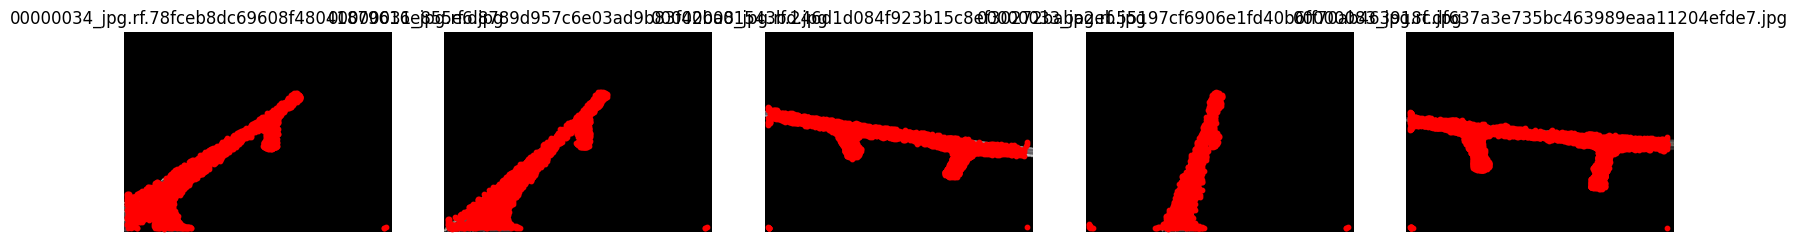

In [50]:
# Load keypoints and visualize
keypoints = load_keypoints(feature_dir)
visualize_keypoints(images, keypoints)

In [51]:
# Visualize Matches
def visualize_matches(image_folder, matched_features, keypoints, num_pairs=2):
    pairs = random.sample(list(matched_features.items()), num_pairs)
    for (img1_name, matches_dict) in pairs:
        for img2_name, matches in matches_dict.items():
            img1 = load_image(os.path.join(image_folder, img1_name))
            img2 = load_image(os.path.join(image_folder, img2_name))
            
            fig, ax = plt.subplots(1, 1, figsize=(12, 6))
            combined_img = np.hstack([img1, img2])
            ax.imshow(combined_img)
            
            kp1 = keypoints[img1_name]
            kp2 = keypoints[img2_name]
            
            for m in matches:
                idx1, idx2 = m
                x0, y0 = kp1[idx1]
                x1, y1 = kp2[idx2]
                ax.plot([x0, x1 + img1.shape[1]], [y0, y1], 'g-', linewidth=0.5)
                ax.scatter([x0, x1 + img1.shape[1]], [y0, y1], s=10, c='red')
            ax.axis('off')
            plt.title(f'Matches between {img1_name} and {img2_name}')
            plt.show()

# Load matched features for visualization
def load_matched_features(feature_dir):
    matched_features = {}
    with h5py.File(f'{feature_dir}/matches.h5', mode='r') as f_match:
        for k1 in f_match.keys():
            group = f_match[k1]
            matched_features[k1] = {}
            for k2 in group.keys():
                matched_features[k1][k2] = group[k2][...]
    return matched_features

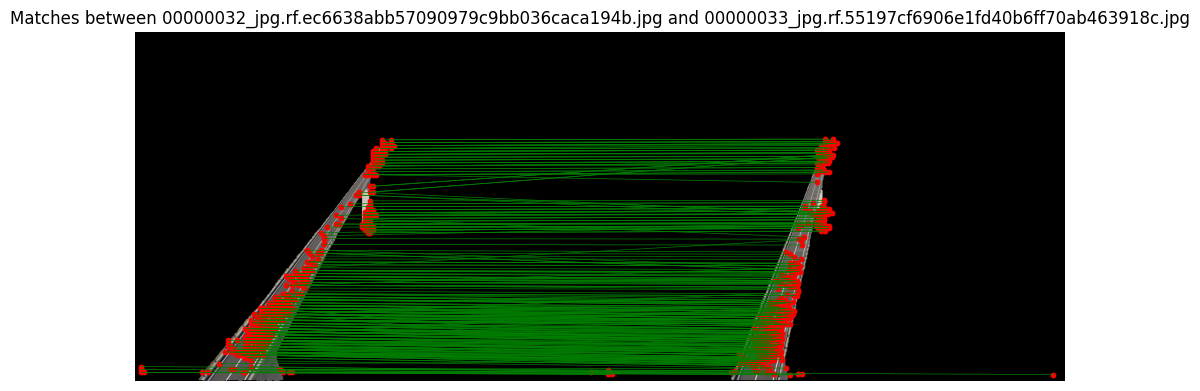

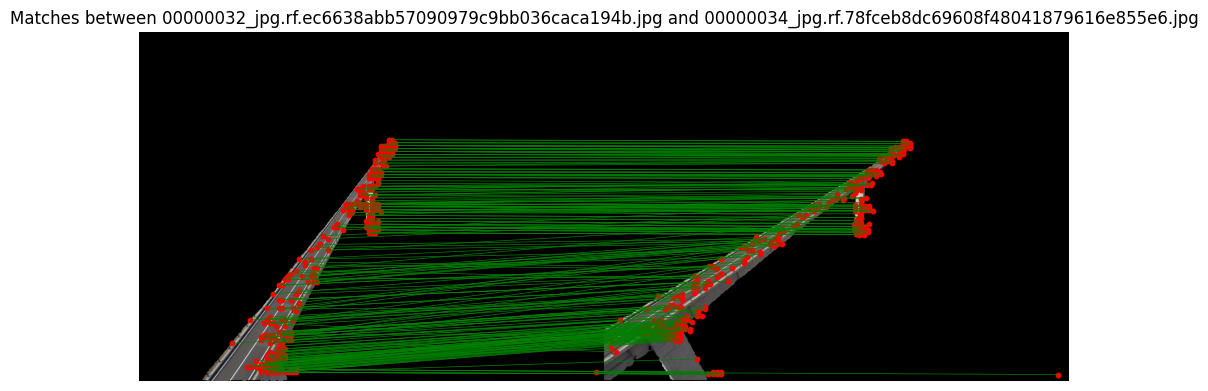

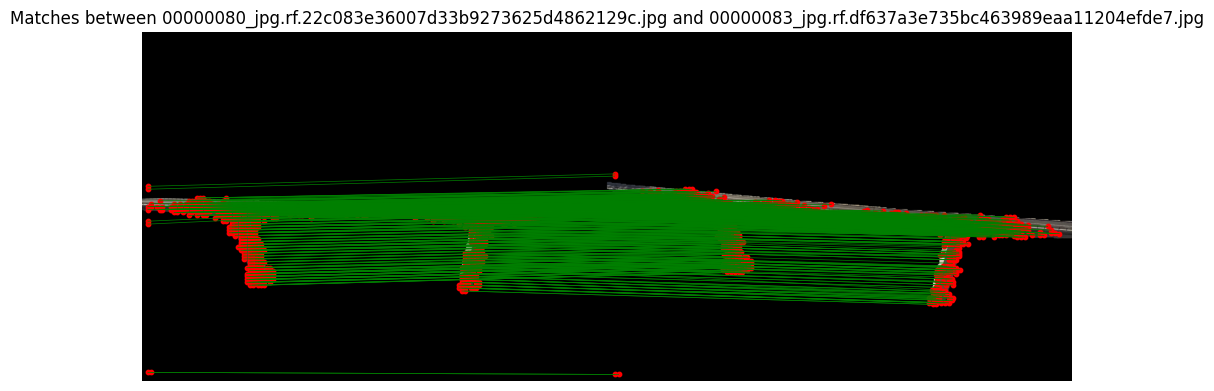

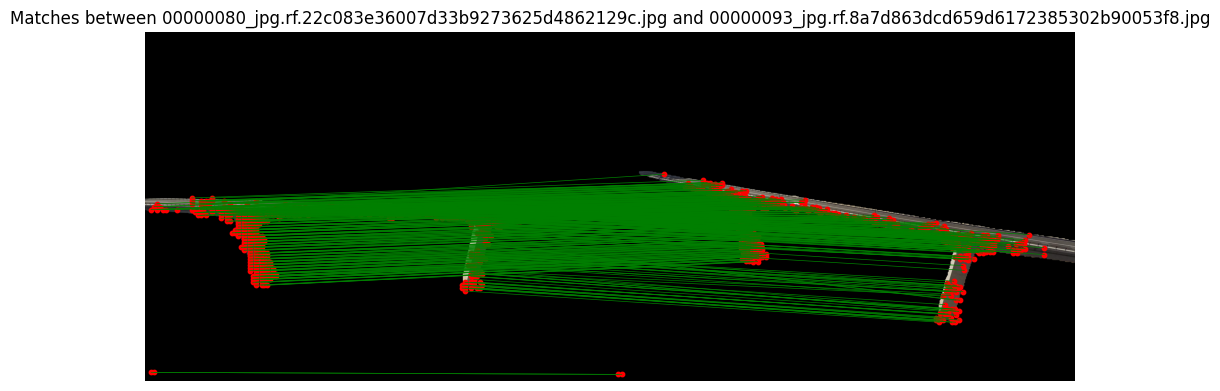

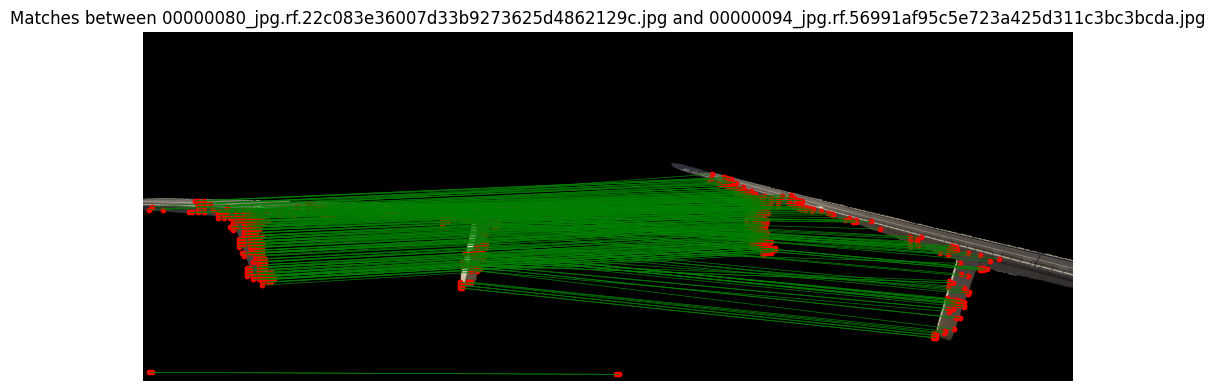

In [52]:
# Load matches and visualize
matched_features = load_matched_features(feature_dir)
visualize_matches(images, matched_features, keypoints)